# AdaBoost Classification with Scikit-Learn

This notebook demonstrates classification using the AdaBoost algorithm from scikit-learn on the Breast Cancer dataset.

## 1. Introduction
We will build, train, and evaluate an AdaBoost model to predict breast cancer malignancy.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## 3. Load and Prepare Data

In [2]:
# Load Breast Cancer dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train AdaBoost Model

In [3]:
# Use Decision Stump as base estimator
base_stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(
    base_estimator=base_stump,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   random_state=42)

## 5. Evaluate Model

In [4]:
y_pred = ada.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Confusion Matrix:
[[ 59   5]
 [  2 105]]


## 6. ROC Curve & AUC

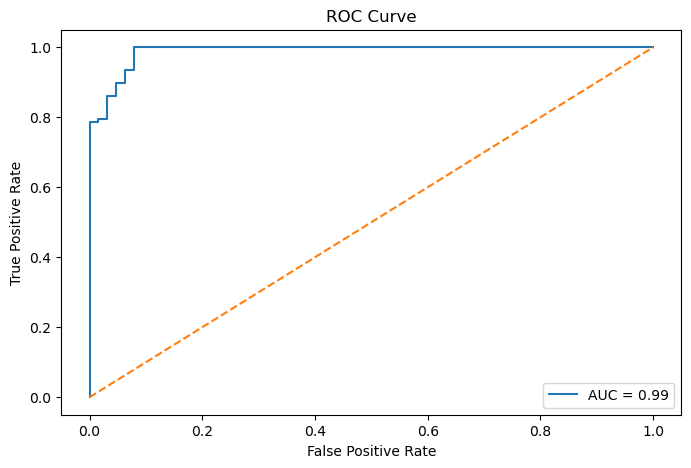

In [5]:
y_score = ada.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 7. Feature Importances

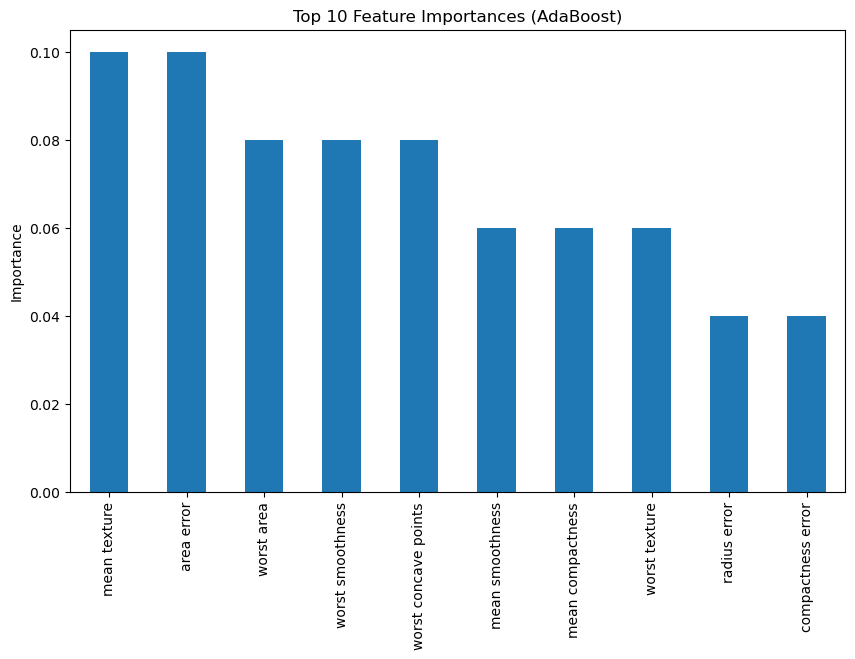

In [6]:
importances = pd.Series(ada.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (AdaBoost)')
plt.show()

## 8. Conclusion
AdaBoost provides an effective ensemble approach. Experiment with `n_estimators`, `learning_rate`, and base estimator complexity for optimization.